In [1]:
import json
import osmnx as ox
from shapely.geometry import Polygon, shape
ox.config(use_cache=True, log_console=True)

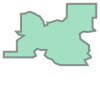

In [2]:
with open('portland_msa.json') as f:
    geojson = json.load(f)
    geom = Polygon(shape(geojson))
geom

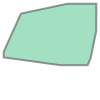

In [3]:
hull = geom.convex_hull
hull

In [4]:
G = ox.graph_from_polygon(hull, network_type='drive', simplify=False, truncate_by_edge=False, name='Portland_MSA')

In [5]:
G_proj = ox.project_graph(G)

In [6]:
G_proj_simp = ox.simplify_graph(G_proj)

In [7]:
G_proj_simp_undir = ox.get_undirected(G_proj_simp)

In [8]:
fig, ax = ox.plot_graph(G_proj_simp_undir, file_format='png', dpi=2500, node_size=0, edge_linewidth=0.05,
                        show=False, save=True, close=True, filename='portland')

In [9]:
fig, ax = ox.plot_graph(G_proj_simp_undir, file_format='svg', show=False, save=True, close=True, filename='portland')

In [10]:
ox.save_graph_shapefile(G_proj_simp_undir, filename='portland')